In [1]:
import os
print(f"current dir: {os.getcwd()}")

import sys
print(f"python executable path: {sys.executable}")

current dir: /home/felipevzps/breast-cancer-prediction/notebooks
python executable path: /home/felipevzps/miniconda3/envs/breast-cancer-prediction/bin/python


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/breast_cancer_bd.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# mapping for "Class"
mapping = {
    2: 0,
    4: 1
}
df["Target_Class_Mapped"] = df["Class"].map(mapping)

In [5]:
# drop "Sample code number"
df = df.drop("Sample code number", axis=1)

In [6]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
 10  Target_Class_Mapped          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
Target_Class_Mapped             int64
dtype: object

In [8]:
na_counts = df.isna().sum()
na_counts

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
Target_Class_Mapped            0
dtype: int64

In [9]:
print(df["Bare Nuclei"].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [10]:
df = df.replace("?", np.nan)
df["Bare Nuclei"] = pd.to_numeric(df["Bare Nuclei"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
 10  Target_Class_Mapped          699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [11]:
na_counts = df.isna().sum()
na_counts

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
Target_Class_Mapped             0
dtype: int64

In [12]:
# create training datasets
y = df["Target_Class_Mapped"]
X = df.drop(["Target_Class_Mapped", "Class"], axis=1)

In [13]:
# split dataset BEFORE training (holdout - 70% training / 30% evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# fill "Bare Nuclei" with median (ONLY FOR TRAINING DATA)
X_train_filled = X_train.copy() 
X_train_filled["Bare Nuclei"] = X_train_filled["Bare Nuclei"].fillna(X_train["Bare Nuclei"].median())

In [15]:
# create a dataframe for visualization of training data
df_train = pd.concat([X_train_filled, y_train], axis=1)

In [16]:
train_na_counts = df_train.isna().sum()
train_na_counts

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Target_Class_Mapped            0
dtype: int64

In [17]:
df_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Target_Class_Mapped
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,4.529652,3.169734,3.296524,2.797546,3.251534,3.619632,3.501022,2.850716,1.560327,0.355828
std,2.819654,3.028861,2.988367,2.798183,2.252531,3.713415,2.524572,3.025202,1.636213,0.479254
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,3.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [18]:
# selecting only numerical columns
num_cols = df_train.select_dtypes("int64", "float64").columns
print(num_cols)
print("total of numerical columns:", len(num_cols))

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Target_Class_Mapped'],
      dtype='object')
total of numerical columns: 9


In [19]:
# selecting only features (remove class column)
features = num_cols.drop(["Target_Class_Mapped"])
print(features)
print("total of numerical columns:", len(features))

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses'],
      dtype='object')
total of numerical columns: 8


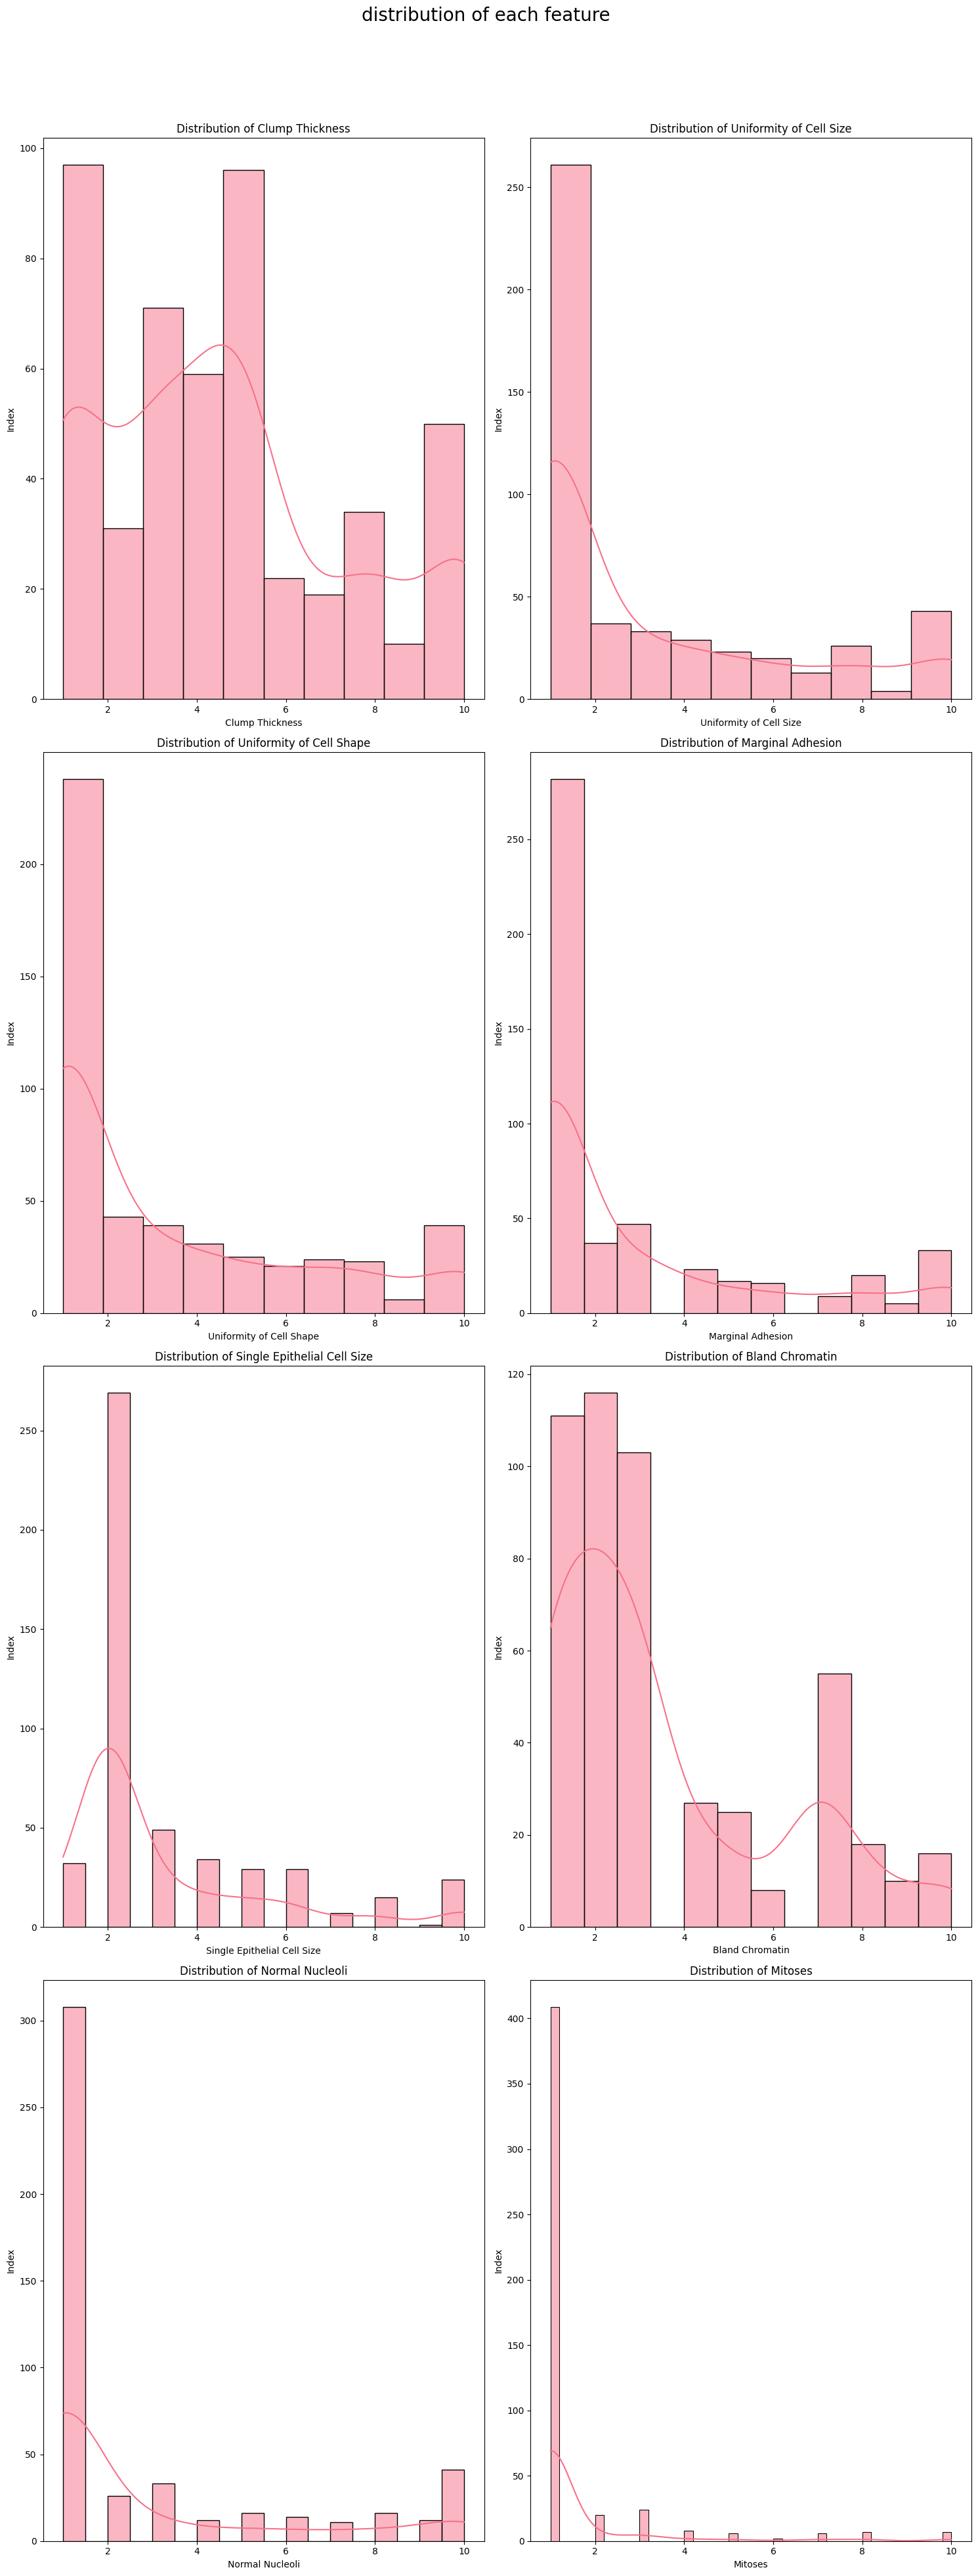

In [20]:
# data visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

# distribution of each feature
fig, ax = plt.subplots(4, 2, figsize=(15, 40))
fig.suptitle("distribution of each feature ", fontsize=20)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(x=df_train[num], ax=ax[row, col], kde=True)
    ax[row, col].set_title(f'Distribution of {num}')
    ax[row, col].set_xlabel(num)
    ax[row, col].set_ylabel('Index')

# adjust layout to leave space for the overall title (top margin)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve the top 5% for suptitle
plt.show()

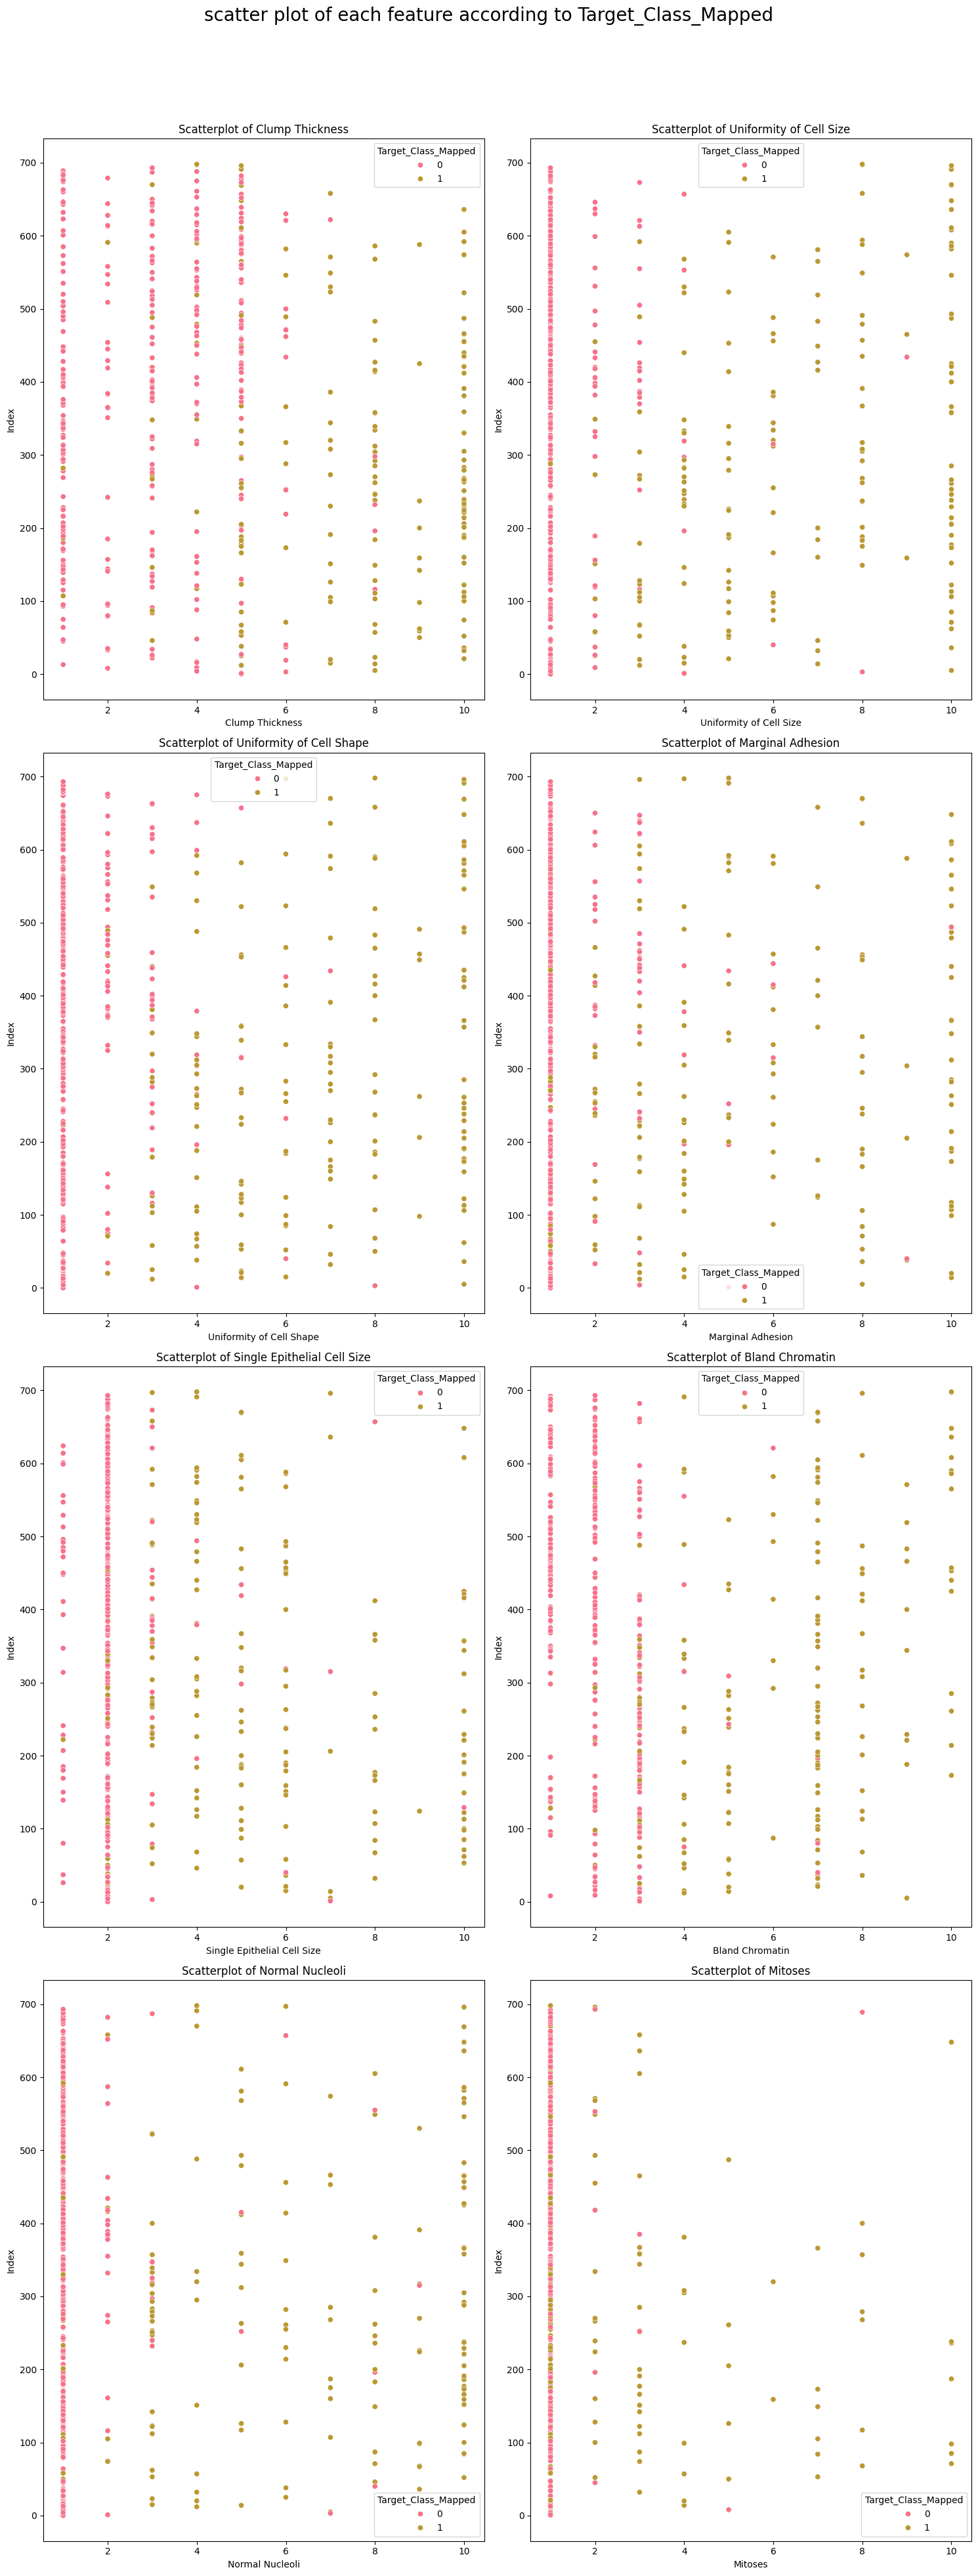

In [21]:
# scatterplot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

# add an overall centered title for the whole figure
fig.suptitle("scatter plot of each feature according to Target_Class_Mapped", fontsize=20)

# plot on individual subplots with their own titles and labels
for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.scatterplot(x=num, y=df_train.index, hue="Target_Class_Mapped", data=df_train, ax=ax[row, col])
    ax[row, col].set_title(f'Scatterplot of {num}')
    ax[row, col].set_xlabel(num)
    ax[row, col].set_ylabel('Index')

# adjust layout to leave space for the overall title (top margin)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve the top 5% for suptitle
plt.show()

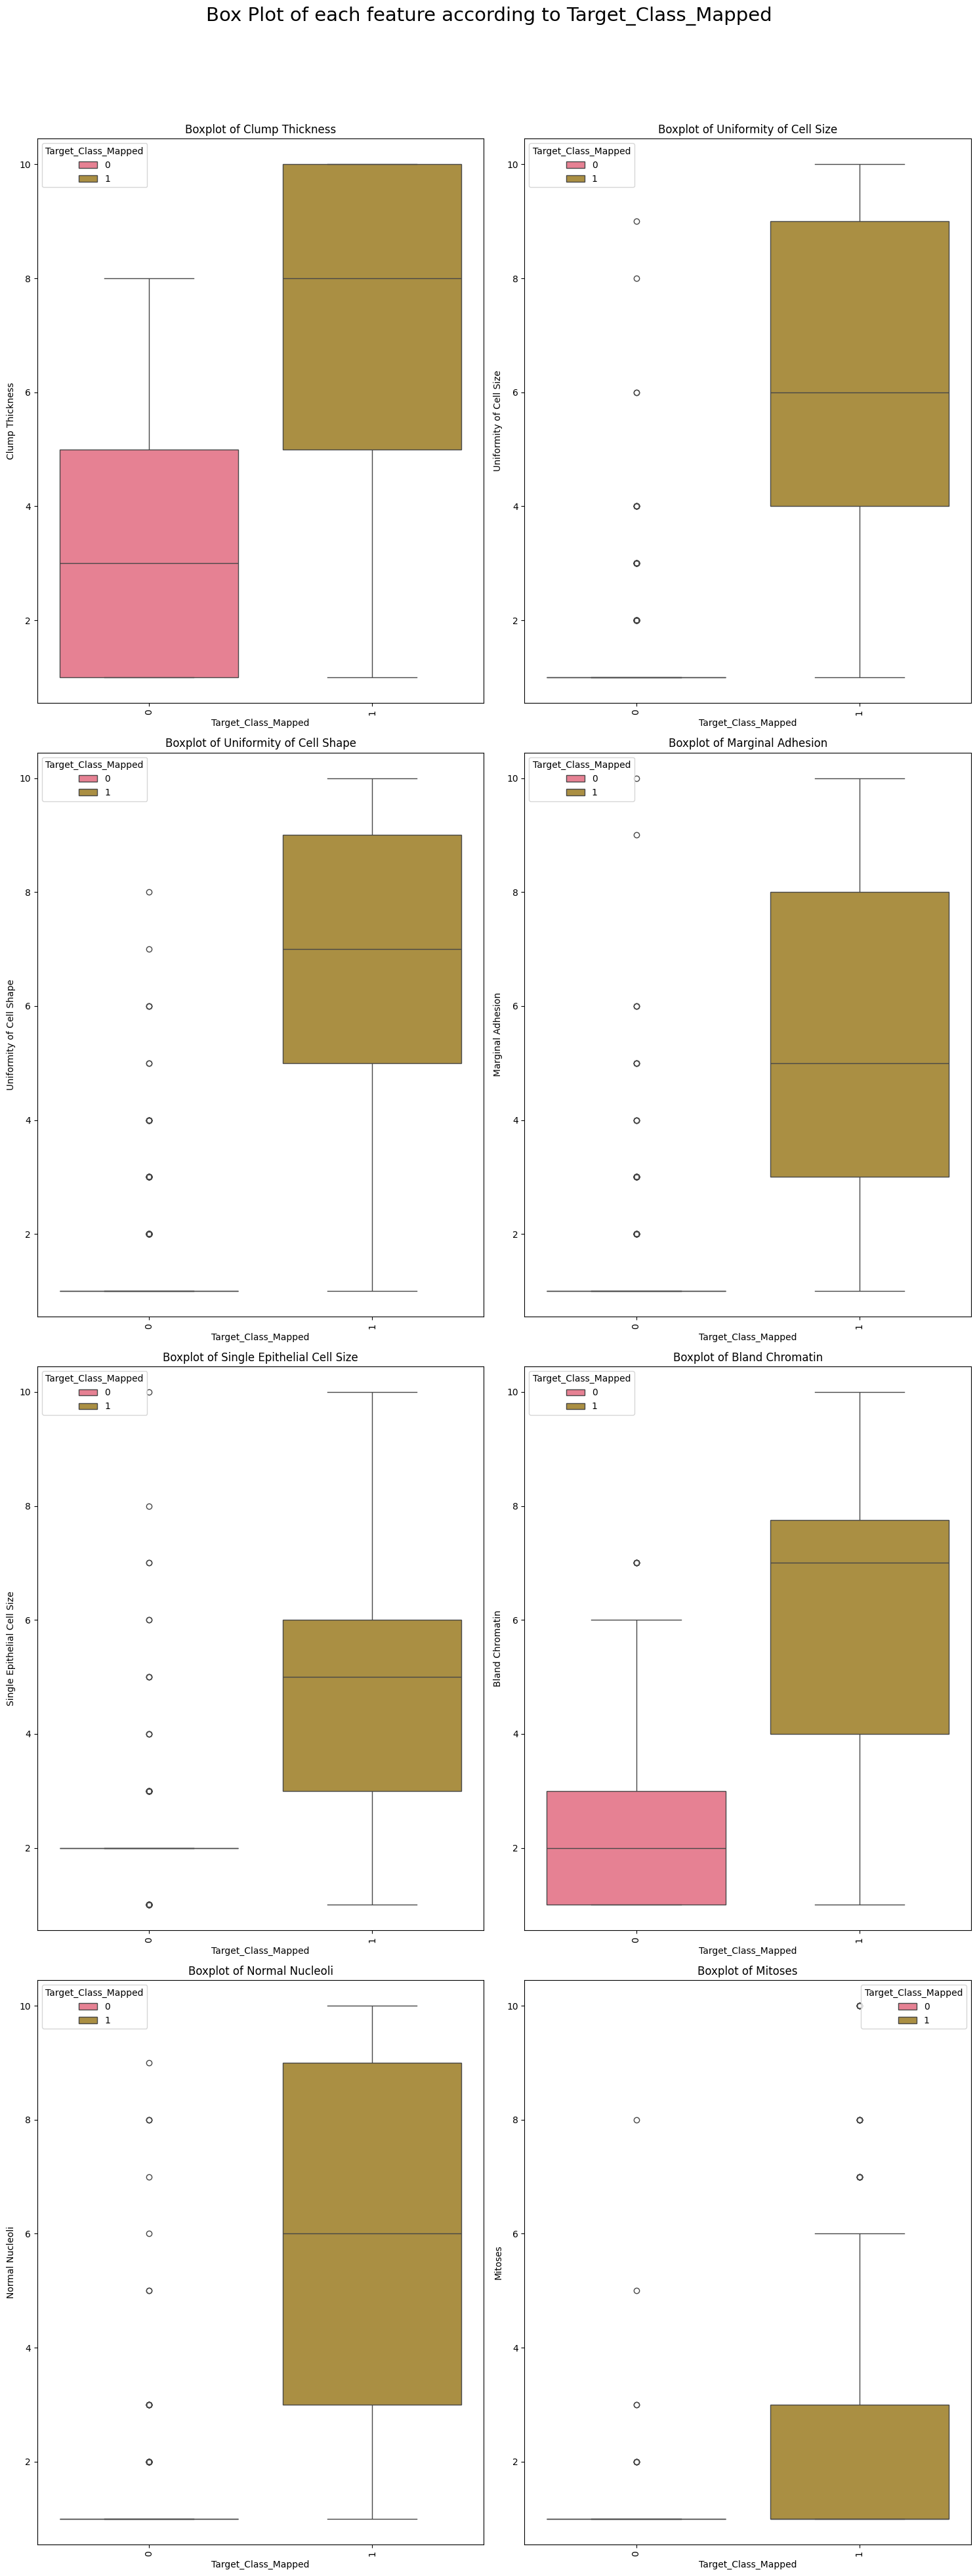

In [22]:
# boxplot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

fig.suptitle("Box Plot of each feature according to Target_Class_Mapped", fontsize=21)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.boxplot(x="Target_Class_Mapped", y=num, data=df_train, ax=ax[row, col], hue="Target_Class_Mapped")
    ax[row, col].set_title(f'Boxplot of {num}')
    ax[row, col].set_xlabel('Target_Class_Mapped')
    ax[row, col].set_ylabel(num)
    ax[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

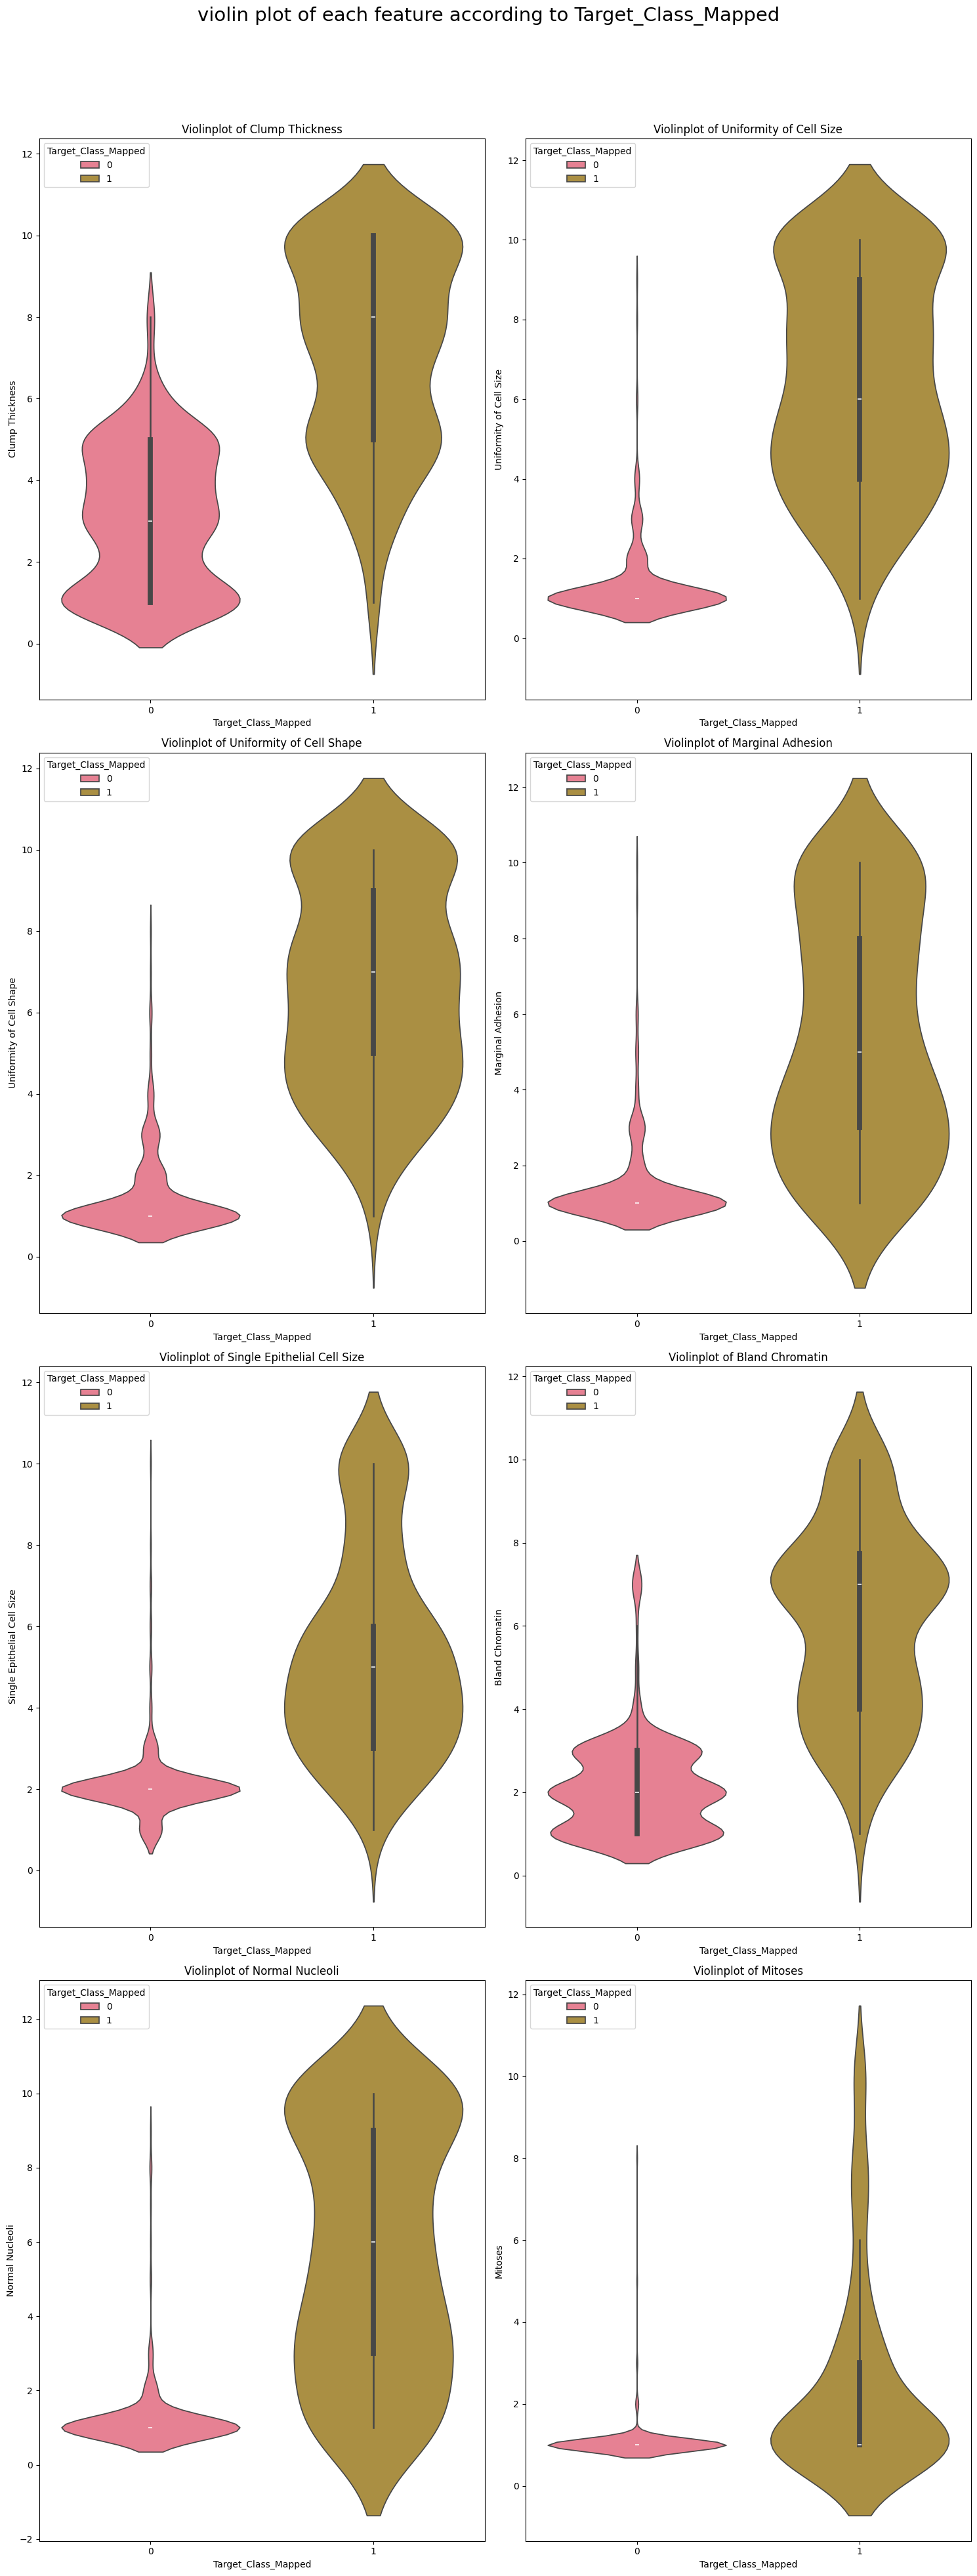

In [23]:
# violin plot of each feature according to Class
fig, ax = plt.subplots(4, 2, figsize=(15, 40))

fig.suptitle("violin plot of each feature according to Target_Class_Mapped", fontsize=21)

for i, num in enumerate(features):
    row = i // 2
    col = i % 2
    sns.violinplot(x="Target_Class_Mapped", y=num, data=df_train, ax=ax[row, col], hue="Target_Class_Mapped")
    ax[row, col].set_title(f'Violinplot of {num}')
    ax[row, col].set_xlabel('Target_Class_Mapped')  

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

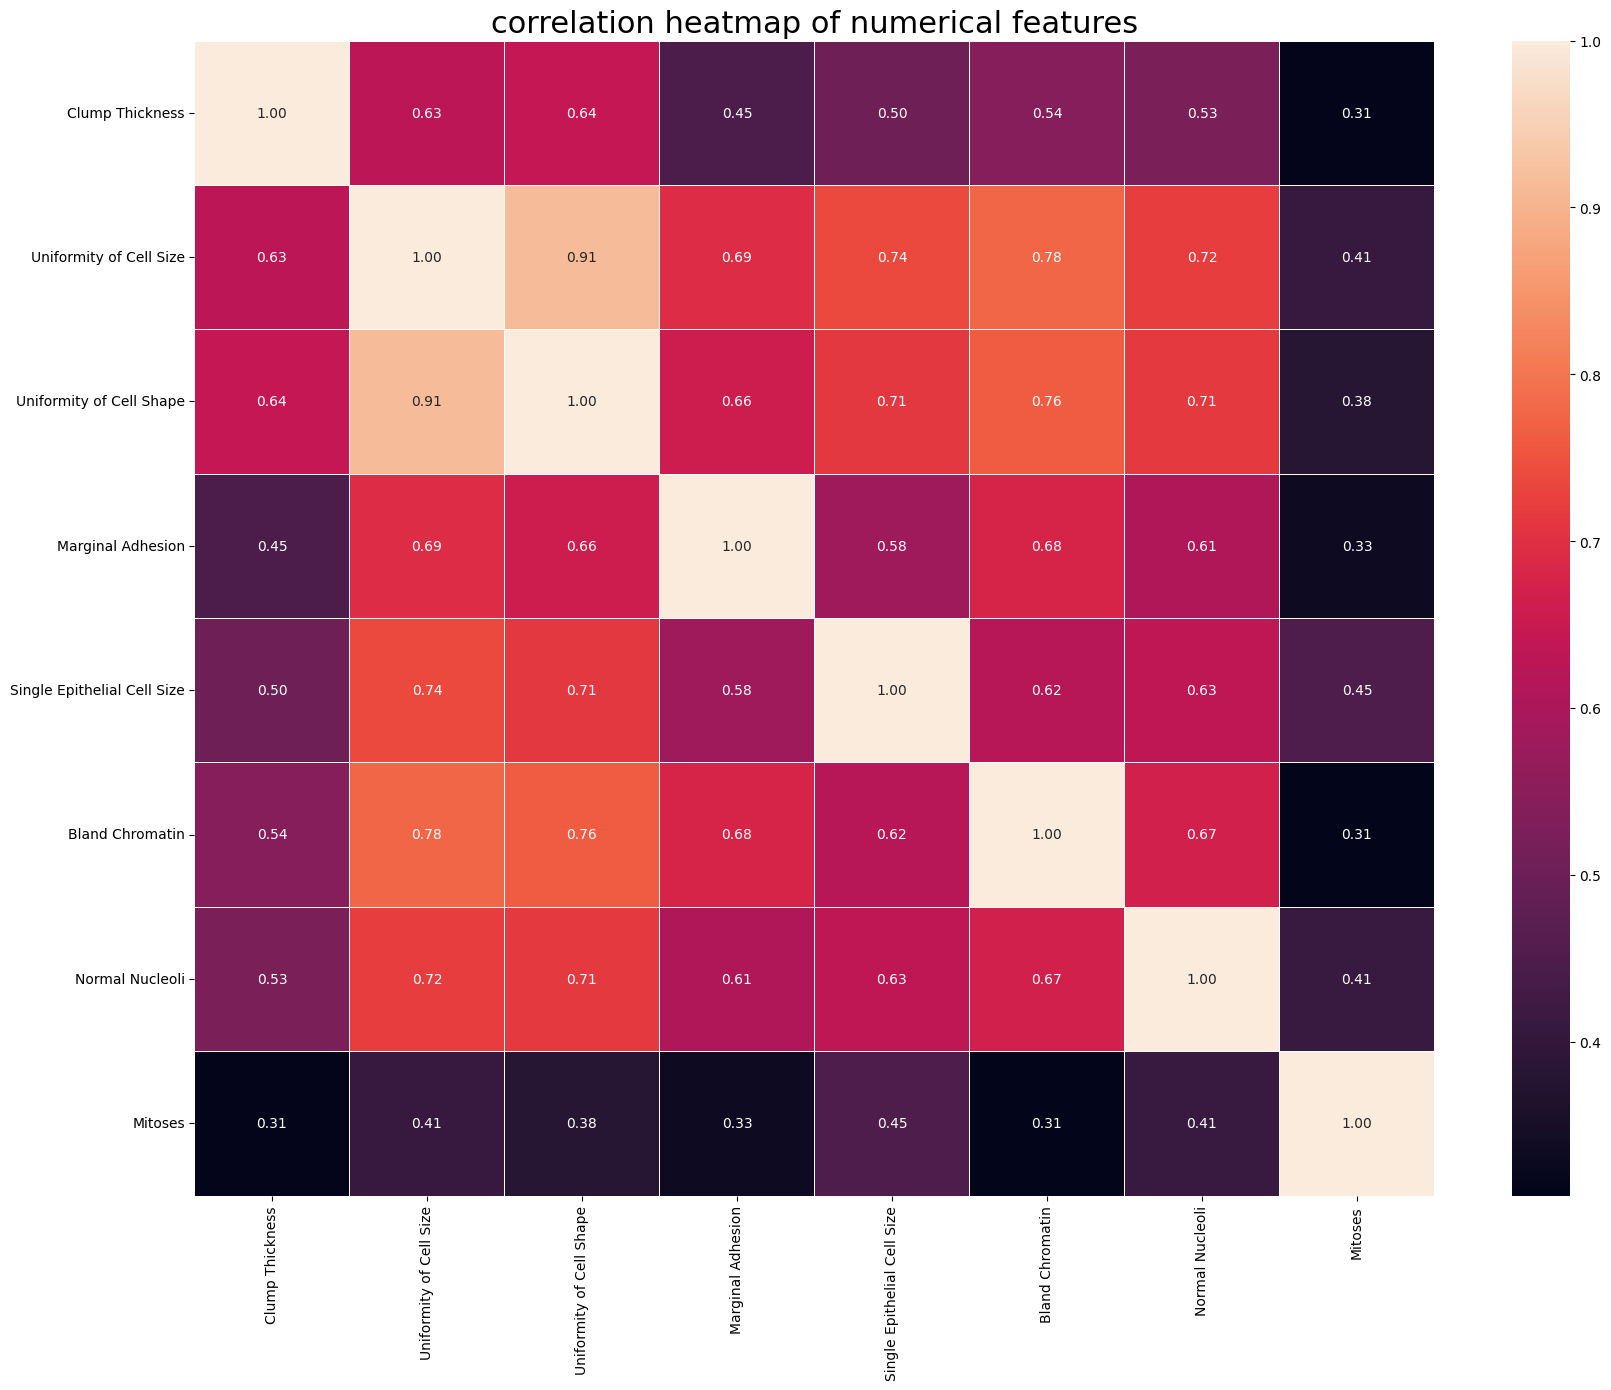

In [24]:
# correlation heatmap of numerical features

plt.figure(figsize=(20, 15))
correlation_matrix = df_train[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('correlation heatmap of numerical features', fontsize=22)
plt.show()